In [801]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import PIL
import cv2
import os
import pathlib
import numpy as np
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense , Flatten, Dropout
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [802]:
data_dir = '/Users/ronaldojerang/Desktop/data_dir'




In [803]:
os.listdir('data')

['sun', 'moon']

In [804]:
len(data_dir)

37

In [805]:

data = tf.keras.utils.image_dataset_from_directory('/Users/ronaldojerang/Desktop/data_dir')

Found 101 files belonging to 2 classes.


In [806]:
os.listdir('data')

['sun', 'moon']

In [807]:
data_iterator = data.as_numpy_iterator()

In [808]:
batch = data_iterator.next()


In [809]:
batch

(array([[[[255.      , 255.      , 255.      ],
          [255.      , 255.      , 255.      ],
          [255.      , 255.      , 255.      ],
          ...,
          [255.      , 255.      , 255.      ],
          [255.      , 255.      , 255.      ],
          [255.      , 255.      , 255.      ]],
 
         [[255.      , 255.      , 255.      ],
          [255.      , 255.      , 255.      ],
          [255.      , 255.      , 255.      ],
          ...,
          [255.      , 255.      , 255.      ],
          [255.      , 255.      , 255.      ],
          [255.      , 255.      , 255.      ]],
 
         [[255.      , 255.      , 255.      ],
          [255.      , 255.      , 255.      ],
          [255.      , 255.      , 255.      ],
          ...,
          [255.      , 255.      , 255.      ],
          [255.      , 255.      , 255.      ],
          [255.      , 255.      , 255.      ]],
 
         ...,
 
         [[255.      , 255.      , 255.      ],
          [255.   

In [810]:
batch[0].shape

(32, 256, 256, 3)

In [811]:
batch[0]

array([[[[255.      , 255.      , 255.      ],
         [255.      , 255.      , 255.      ],
         [255.      , 255.      , 255.      ],
         ...,
         [255.      , 255.      , 255.      ],
         [255.      , 255.      , 255.      ],
         [255.      , 255.      , 255.      ]],

        [[255.      , 255.      , 255.      ],
         [255.      , 255.      , 255.      ],
         [255.      , 255.      , 255.      ],
         ...,
         [255.      , 255.      , 255.      ],
         [255.      , 255.      , 255.      ],
         [255.      , 255.      , 255.      ]],

        [[255.      , 255.      , 255.      ],
         [255.      , 255.      , 255.      ],
         [255.      , 255.      , 255.      ],
         ...,
         [255.      , 255.      , 255.      ],
         [255.      , 255.      , 255.      ],
         [255.      , 255.      , 255.      ]],

        ...,

        [[255.      , 255.      , 255.      ],
         [255.      , 255.      , 255.      ]

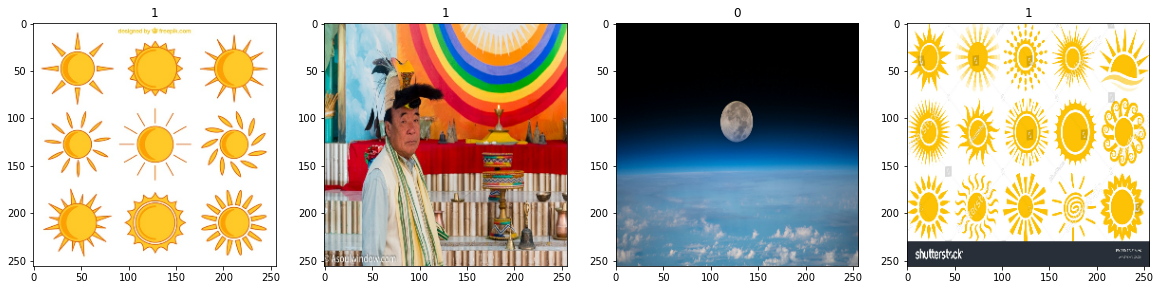

In [812]:

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [813]:
batch[1]

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0], dtype=int32)

In [814]:
scaled = batch[0]/255

In [815]:
scaled.max()

1.0

In [816]:

data = data.map(lambda x,y: (x/255, y))

In [817]:
data.as_numpy_iterator().next()[0]

array([[[[3.22763473e-02, 6.18138351e-02, 9.99862701e-02],
         [2.35294122e-02, 6.27451017e-02, 9.80392173e-02],
         [3.07751223e-02, 6.17192872e-02, 9.91883799e-02],
         ...,
         [7.84313772e-03, 7.84313772e-03, 7.84313772e-03],
         [7.84313772e-03, 7.84313772e-03, 7.84313772e-03],
         [3.92156886e-03, 3.92156886e-03, 3.92156886e-03]],

        [[3.12270224e-02, 6.28906265e-02, 1.05882354e-01],
         [2.33838856e-02, 6.30361512e-02, 1.02106310e-01],
         [3.00321691e-02, 6.29127920e-02, 1.05307095e-01],
         ...,
         [7.84313772e-03, 7.84313772e-03, 7.84313772e-03],
         [7.84313772e-03, 7.84313772e-03, 7.84313772e-03],
         [7.84313772e-03, 7.84313772e-03, 7.84313772e-03]],

        [[2.30539963e-02, 6.66666701e-02, 1.11596204e-01],
         [1.67509187e-02, 7.05882385e-02, 1.11596204e-01],
         [2.09775139e-02, 6.72640949e-02, 1.11596204e-01],
         ...,
         [7.40790274e-03, 7.40790274e-03, 7.40790274e-03],
         [

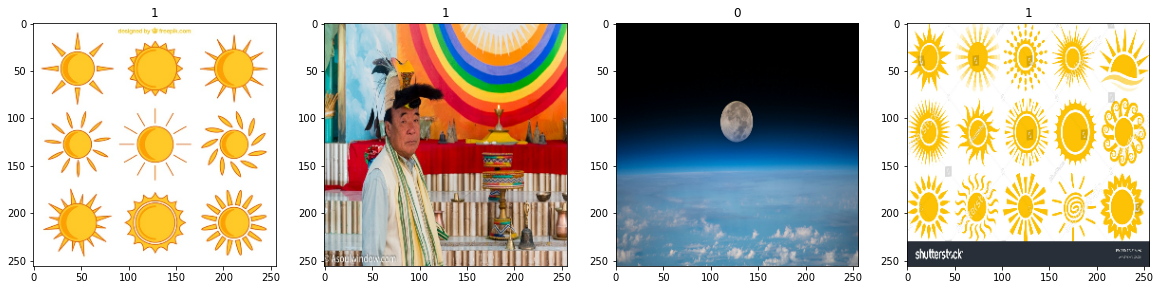

In [818]:

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [819]:
len(data)

4

In [820]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.1)+1
test_size = int(len(data)*.1)+1

In [821]:
train_size

2

In [822]:
val_size

1

In [823]:
test_size

1

In [824]:
train_size + val_size + test_size

4

In [825]:
train_size

2

In [826]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [827]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [828]:

model = Sequential()

In [829]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [830]:

model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [831]:

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_40 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 30, 30, 32)      

In [832]:

logdir='log'

In [833]:
tensorbord = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [834]:
trained_model  = model.fit(train, epochs= 10, validation_data = val ,callbacks = [tensorbord] ) 


Epoch 1/10
2/2 [==============================] - 7s 3s/step - loss: 0.6403 - accuracy: 0.5312 - val_loss: 0.7202 - val_accuracy: 0.5312
Epoch 2/10
2/2 [==============================] - 5s 3s/step - loss: 0.6326 - accuracy: 0.6562 - val_loss: 0.5564 - val_accuracy: 0.7812
Epoch 3/10
2/2 [==============================] - 5s 3s/step - loss: 0.5195 - accuracy: 0.8125 - val_loss: 0.4036 - val_accuracy: 0.9062
Epoch 4/10
2/2 [==============================] - 5s 3s/step - loss: 0.4510 - accuracy: 0.8281 - val_loss: 0.2204 - val_accuracy: 0.9688
Epoch 5/10
2/2 [==============================] - 5s 3s/step - loss: 0.2793 - accuracy: 0.9375 - val_loss: 0.1596 - val_accuracy: 0.9375
Epoch 6/10
2/2 [==============================] - 5s 3s/step - loss: 0.2968 - accuracy: 0.8750 - val_loss: 0.1552 - val_accuracy: 0.9375
Epoch 7/10
2/2 [==============================] - 5s 3s/step - loss: 0.1820 - accuracy: 0.9375 - val_loss: 0.1720 - val_accuracy: 0.9688
Epoch 8/10
2/2 [=========================

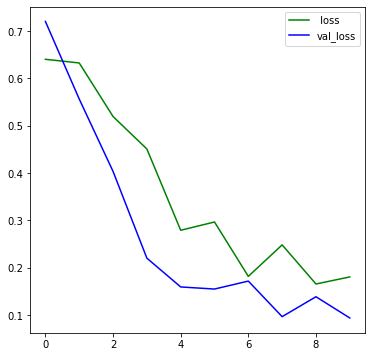

In [835]:
plt.figure(figsize = (6,6))
plt.plot(trained_model.history ['loss'], color = 'green', label = ' loss')
plt.plot(trained_model.history['val_loss'], color = 'blue',label = 'val_loss')
fig.suptitle('loss',fontsize = 10)
plt.legend(loc = "upper right")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

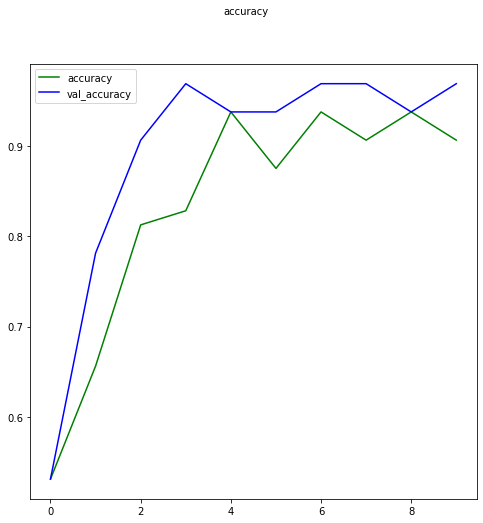

In [836]:
plt.figure(figsize = (8,8))
plt.plot(trained_model.history['accuracy'],color = 'green', label = 'accuracy')
plt.plot(trained_model.history['val_accuracy'], color = 'blue', label = 'val_accuracy')
plt.suptitle('accuracy', fontsize = 10)
plt.legend(loc = "upper left")
plt.show

In [837]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [838]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [839]:
for batch in test.as_numpy_iterator():
    X,y = batch
    ya = model.predict(X)
    pre.update_state(y,ya)
    re.update_state(y,ya)
    acc.update_state(y,ya)

In [840]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


In [841]:
img = cv2.imread('/Users/ronaldojerang/Desktop/imagetest.jpg')

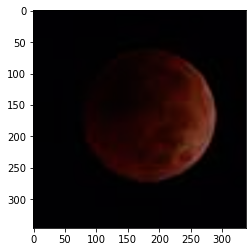

In [842]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [843]:
resize = tf.image.resize(img,(256,256))

plt.show()

In [844]:
np.expand_dims(resize/255,0)

array([[[[0.01176471, 0.        , 0.00392157],
         [0.01176471, 0.        , 0.00392157],
         [0.01176471, 0.        , 0.00392157],
         ...,
         [0.01176471, 0.        , 0.00392157],
         [0.01176471, 0.        , 0.00392157],
         [0.01176471, 0.        , 0.00392157]],

        [[0.01176471, 0.        , 0.00392157],
         [0.01176471, 0.        , 0.00392157],
         [0.01176471, 0.        , 0.00392157],
         ...,
         [0.01176471, 0.        , 0.00392157],
         [0.01176471, 0.        , 0.00392157],
         [0.01176471, 0.        , 0.00392157]],

        [[0.01176471, 0.        , 0.00392157],
         [0.01176471, 0.        , 0.00392157],
         [0.01176471, 0.        , 0.00392157],
         ...,
         [0.01176471, 0.        , 0.00392157],
         [0.01176471, 0.        , 0.00392157],
         [0.01176471, 0.        , 0.00392157]],

        ...,

        [[0.01176471, 0.00392157, 0.00392157],
         [0.01176471, 0.00392157, 0.00392157]

In [845]:
ya = model.predict(np.expand_dims(resize/255,0))

In [846]:
ya

array([[0.1162439]], dtype=float32)

In [847]:
if ya > 0.5:
    print('it is a sun')
else:
    print('it is a moon')

it is a moon


In [848]:
from tensorflow.keras.models import load_model


In [849]:
model.save(os.path.join('/Users/ronaldojerang/Desktop/models', 'donipolo.h5'))

In [850]:
new_model=load_model(os.path.join('/Users/ronaldojerang/Desktop/models', 'donipolo.h5'))

In [851]:
new_model.predict(np.expand_dims(resize/255, 0))

array([[0.1162439]], dtype=float32)